In [8]:
import sys
import os
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
from matplotlib import animation, rc
import seaborn as sns
import numpy as np
import xarray as xr
import pandas as pd
import geopandas as gpd
import rioxarray
from shapely.geometry import mapping
from eofs.xarray import Eof
from xarrayutils.utils import linear_trend
import gc
import collections
import statsmodels.api as sm
import scipy

In [11]:
sns.set_theme(style="whitegrid")
plt.rcParams.update({'font.size': 25})
plt.rc('font', family='sans-serif') 
plt.rc('font', serif='Helvetica Neue')

In [2]:
# Define project repo path
inDirName = '/Users/smurugan9/research/aislens/aislens_emulation/'

# DATA FILE PATHS

# Data containing regridded flux and SSH for 150 years
regriddedFluxSSH_filepath = 'data/interim/RegriddedFluxSSH.nc'

# File contains all defined ice shelves
iceShelvesShape_filepath = 'data/interim/iceShelves.geojson'

# Folder for output figures
figures_folderpath = 'reports/figures/' 

interim_data_folder = 'data/interim/'
flux_dedrafted_data_path = 'dedrafted_flux_IMBIE/'
randomized_realizations_path = 'randomized_realizations/'
flux_dedrafted_iceshelves_data_path = 'iceshelves_dedrafted_flux/'

In [3]:
data = xr.open_dataset(inDirName + regriddedFluxSSH_filepath)
flux = data.timeMonthly_avg_landIceFreshwaterFlux
ssh = data.timeMonthly_avg_ssh

# Read geoJSON region feature file as GeoDataFrame
iceshelvesmask = gpd.read_file(inDirName + iceShelvesShape_filepath)
# Convert to south polar stereographic projection
icems = iceshelvesmask.to_crs({'init': 'epsg:3031'});
crs = ccrs.SouthPolarStereo();
# Specify projection for data file
data.rio.write_crs("epsg:3031",inplace=True);
# Specify projection for data file flux array
flux.rio.write_crs("epsg:3031",inplace=True);

/Users/smurugan9/opt/anaconda3/envs/aislens/lib/python3.10/site-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


In [6]:
flux_ts = flux.sum(['x','y'])

In [14]:
flux_ts_demeaned = flux_ts - flux_ts.mean('time')

Text(0.5, 0, 'Time (months)')

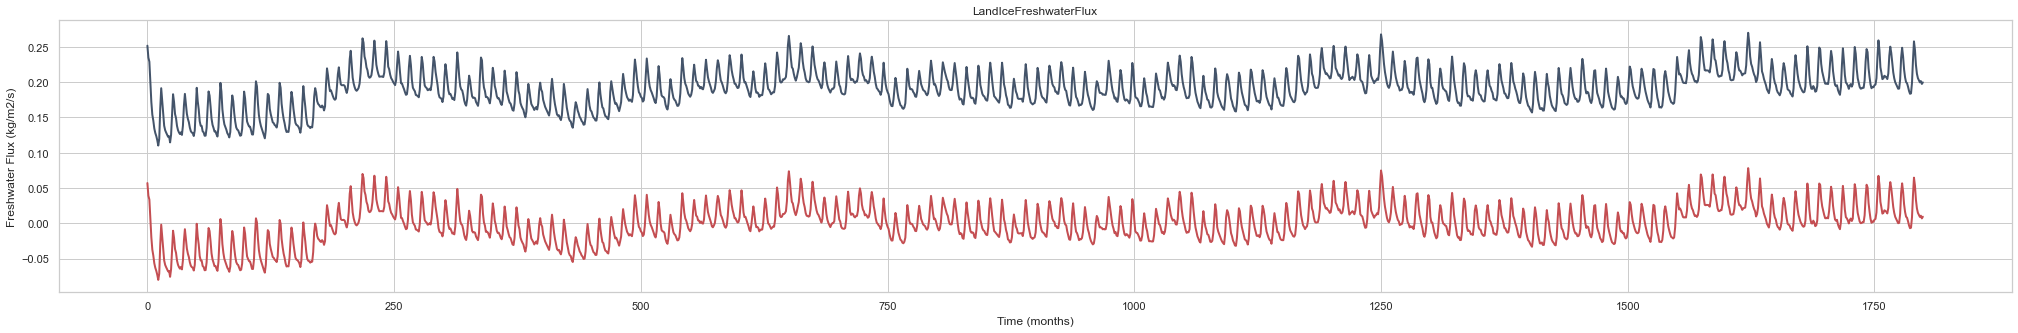

In [23]:
plt.figure(figsize=(35,5))
plt.plot(flux_ts, color = '#44546A', linewidth=2)
plt.plot(flux_dedraft_ts, color = 'r', linewidth=2)
plt.title('LandIceFreshwaterFlux')
plt.ylabel('Freshwater Flux (kg/m2/s)')
plt.xlabel('Time (months)')

In [16]:
iceshelves_dedrafted_total = xr.open_dataset(inDirName+
                                             interim_data_folder+
                                             flux_dedrafted_iceshelves_data_path+
                                             'iceshelves_dedrafted_total.nc')

In [17]:
flux_dedraft = iceshelves_dedrafted_total.timeMonthly_avg_landIceFreshwaterFlux
h = ssh

In [19]:
flux_dedraft_ts = flux_dedraft.sum(['x','y'])

Text(0.5, 0, 'Time (months)')

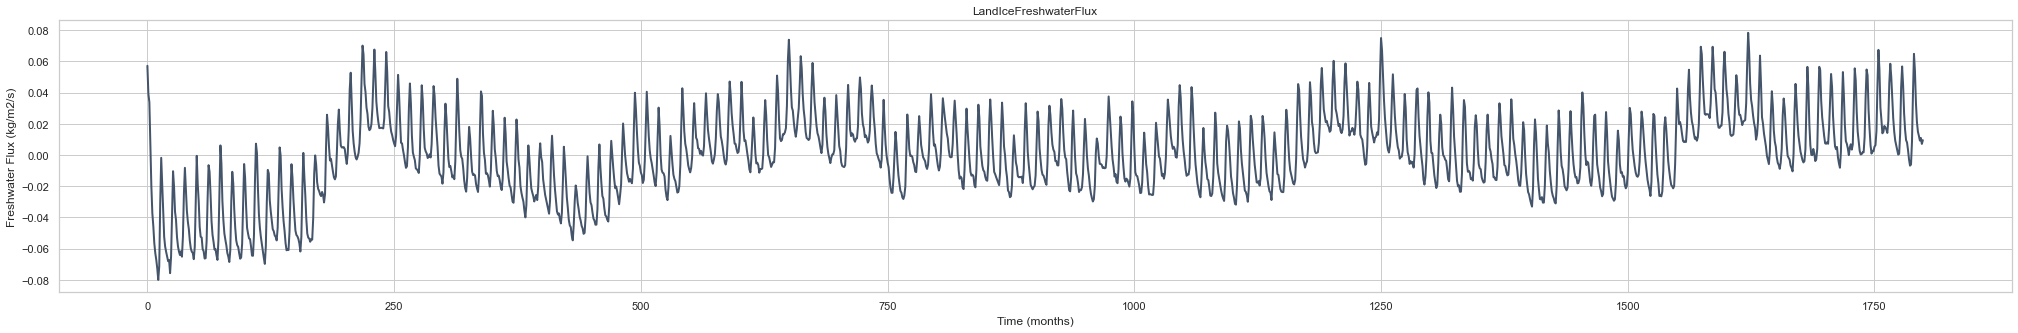

In [20]:
plt.figure(figsize=(35,5))
plt.plot(flux_dedraft_ts, color = '#44546A', linewidth=2)
plt.title('LandIceFreshwaterFlux')
plt.ylabel('Freshwater Flux (kg/m2/s)')
plt.xlabel('Time (months)')

In [24]:
# Demean: remove temporal mean
flux_dedraft_tmean = flux_dedraft.mean('time')
flux_dedraft_demeaned = flux_dedraft - flux_dedraft_tmean

In [25]:
flux_dedraft_demeaned_ts = flux_dedraft_demeaned.sum(['x','y'])

Text(0.5, 0, 'Time (months)')

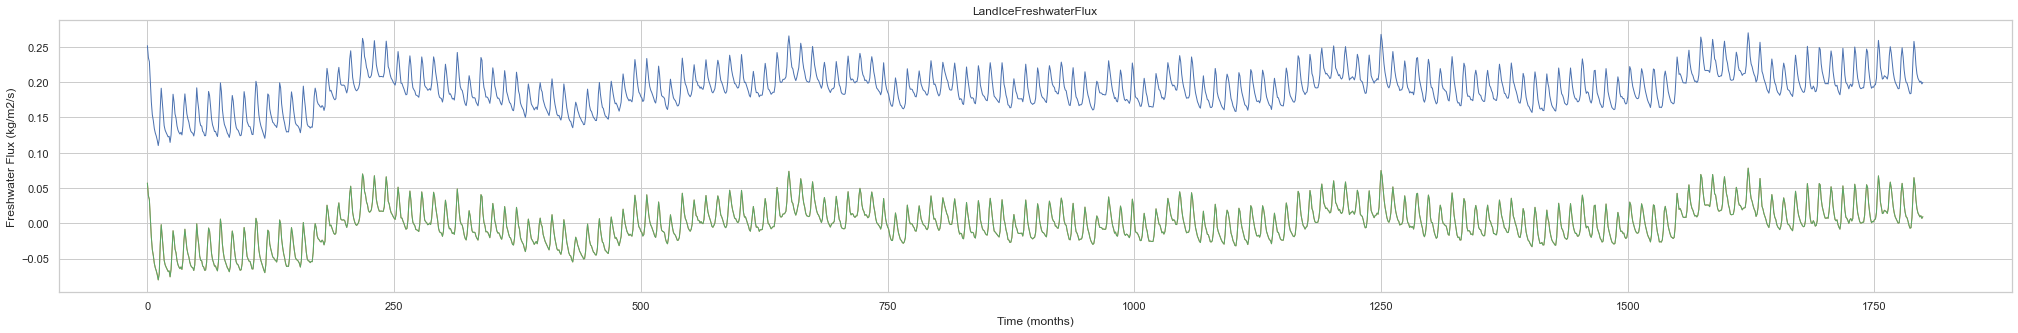

In [38]:
plt.figure(figsize=(35,5))
plt.plot(flux_ts, linewidth=1)
plt.plot(flux_dedraft_ts, linewidth=1)
plt.plot(flux_dedraft_demeaned_ts, linewidth=1)
plt.title('LandIceFreshwaterFlux')
plt.ylabel('Freshwater Flux (kg/m2/s)')
plt.xlabel('Time (months)')